In [4]:
!pip install google


   ---------------------------------------- 3/3 [google]



In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d asheniranga/leaf-disease-dataset-combination

Dataset URL: https://www.kaggle.com/datasets/asheniranga/leaf-disease-dataset-combination
License(s): GPL-2.0
 90% 688M/761M [00:03<00:01, 49.9MB/s]
100% 761M/761M [00:03<00:00, 203MB/s] 


In [ ]:
!unzip leaf-disease-dataset-combination.zip -d dataset


In [4]:
!pip install tensorflow==2.19.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 728.0 kB/s eta 0:00:000:01m00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 104.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.9/319.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 140.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 135.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.2
    Uninstalling protobuf-6.33.2:
      Successfully uninstalled protobuf-6.33.2


In [6]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 21.6 MB/s eta 0:00:00:00:0100:01


In [13]:
import os
import shutil
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications.vgg16 import preprocess_input
import cv2
import numpy as np
from tensorflow.keras.utils import Sequence
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.applications.vgg16 import VGG16


In [ ]:
list_dir=['train','test','validation']
for i in list_dir:
  SOURCE_DIR = f"image data\{i}\images"
  TARGET_DIR = f"image data\{i}\images"
  IMAGE_DIR = os.path.join(TARGET_DIR, "images")

  os.makedirs(IMAGE_DIR, exist_ok=True)

  records = []
  count = 0

  for plant in os.listdir(SOURCE_DIR):
    plant_path = os.path.join(SOURCE_DIR, plant)
    if not os.path.isdir(plant_path):
      continue

    for disease in os.listdir(plant_path):
      disease_path = os.path.join(plant_path, disease)
      if not os.path.isdir(disease_path):
          continue

      for img in os.listdir(disease_path):
          if img.lower().endswith((".jpg", ".jpeg", ".png")):
              shutil.copy(
                  os.path.join(disease_path, img),
                  os.path.join(IMAGE_DIR, img)
              )

              records.append({
                  "image": img,
                  "plant": plant,
                  "disease": disease
              })
              count += 1

  df = pd.DataFrame(records)
  df.to_csv(os.path.join(TARGET_DIR, "labels.csv"), index=False)

  print("Dataset restructured successfully")


Dataset restructured successfully
Dataset restructured successfully
Dataset restructured successfully


In [1]:
from tensorflow.keras.models import load_model

model = load_model("plant_model.keras")



TypeError: Could not deserialize class 'Functional' because its parent module keras.src.models.functional cannot be imported. Full object config: {'module': 'keras.src.models.functional', 'class_name': 'Functional', 'config': {'name': 'functional_1', 'trainable': True, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': [None, 224, 224, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'input_layer'}, 'registered_name': None, 'name': 'input_layer', 'inbound_nodes': []}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block1_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 3]}, 'name': 'block1_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 3], 'dtype': 'float32', 'keras_history': ['input_layer', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block1_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 64, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 224, 224, 64]}, 'name': 'block1_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 64], 'dtype': 'float32', 'keras_history': ['block1_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block1_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'block1_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 224, 224, 64], 'dtype': 'float32', 'keras_history': ['block1_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block2_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 64]}, 'name': 'block2_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 64], 'dtype': 'float32', 'keras_history': ['block1_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block2_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 128, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 112, 112, 128]}, 'name': 'block2_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 128], 'dtype': 'float32', 'keras_history': ['block2_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block2_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'block2_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 112, 112, 128], 'dtype': 'float32', 'keras_history': ['block2_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 128]}, 'name': 'block3_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 128], 'dtype': 'float32', 'keras_history': ['block2_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 256]}, 'name': 'block3_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block3_conv3', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 256, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 56, 56, 256]}, 'name': 'block3_conv3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block3_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'block3_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 56, 56, 256], 'dtype': 'float32', 'keras_history': ['block3_conv3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv1', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 256]}, 'name': 'block4_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 256], 'dtype': 'float32', 'keras_history': ['block3_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv2', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 512]}, 'name': 'block4_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block4_conv3', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 28, 28, 512]}, 'name': 'block4_conv3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block4_pool', 'trainable': False, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'block4_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 28, 28, 512], 'dtype': 'float32', 'keras_history': ['block4_conv3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block4_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv2', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv2', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'block5_conv3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'filters': 512, 'kernel_size': [3, 3], 'strides': [1, 1], 'padding': 'same', 'data_format': 'channels_last', 'dilation_rate': [1, 1], 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 14, 14, 512]}, 'name': 'block5_conv3', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv2', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'MaxPooling2D', 'config': {'name': 'block5_pool', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'pool_size': [2, 2], 'padding': 'valid', 'strides': [2, 2], 'data_format': 'channels_last'}, 'registered_name': None, 'name': 'block5_pool', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 14, 14, 512], 'dtype': 'float32', 'keras_history': ['block5_conv3', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'GlobalAveragePooling2D', 'config': {'name': 'global_average_pooling2d_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'data_format': 'channels_last', 'keepdims': False}, 'registered_name': None, 'name': 'global_average_pooling2d_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 7, 7, 512], 'dtype': 'float32', 'keras_history': ['block5_pool', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 512]}, 'name': 'dense_1', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 512], 'dtype': 'float32', 'keras_history': ['global_average_pooling2d_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'disease_output', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'units': 29, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}, 'name': 'disease_output', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 256], 'dtype': 'float32', 'keras_history': ['dense_1', 0, 0]}}], 'kwargs': {}}]}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'plant_output', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None, 'shared_object_id': 132913588245840}, 'units': 13, 'activation': 'softmax', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': [None, 256]}, 'name': 'plant_output', 'inbound_nodes': [{'args': [{'class_name': '__keras_tensor__', 'config': {'shape': [None, 256], 'dtype': 'float32', 'keras_history': ['dense_1', 0, 0]}}], 'kwargs': {}}]}], 'input_layers': [['input_layer', 0, 0]], 'output_layers': {'plant_output': ['plant_output', 0, 0], 'disease_output': ['disease_output', 0, 0]}}, 'registered_name': 'Functional', 'build_config': {'input_shape': None}, 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'Adam', 'config': {'name': 'adam', 'learning_rate': 9.999999747378752e-06, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}, 'registered_name': None}, 'loss': {'plant_output': 'sparse_categorical_crossentropy', 'disease_output': 'sparse_categorical_crossentropy'}, 'loss_weights': None, 'metrics': {'plant_output': ['accuracy'], 'disease_output': ['accuracy']}, 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': True}}

In [10]:
df_train=pd.read_csv(r"image data\train\labels.csv")
df_test=pd.read_csv(r"image data\test\labels.csv")
df_validation=pd.read_csv(r"image data\validation\labels.csv")


In [14]:
plant_encoder=LabelEncoder()
disease_encoder=LabelEncoder()

df_train["plant_id"] = plant_encoder.fit_transform(df_train["plant"])
df_train["disease_id"] = disease_encoder.fit_transform(df_train["disease"])

num_plants = df_train["plant_id"].nunique()
num_diseases = df_train["disease_id"].nunique()
df_test["plant_id"] = plant_encoder.transform(df_test["plant"])
df_test["disease_id"] = disease_encoder.transform(df_test["disease"])
df_validation["plant_id"] = plant_encoder.transform(df_validation["plant"])
df_validation["disease_id"] = disease_encoder.transform(df_validation["disease"])
print("num_diseases:",num_diseases)
print("num_plants",num_plants)

num_diseases: 29
num_plants 13


In [15]:
import pickle
pickle.dump(plant_encoder,open("plant_encoder.pkl","wb"))
pickle.dump(disease_encoder,open("disease_encoder.pkl","wb"))

In [ ]:
plant_encoder.classes_

array(['Cassava', 'Rice', 'apple', 'cherry (including sour)',
       'corn (maize)', 'grape', 'orange', 'peach', 'pepper, bell',
       'potato', 'squash', 'strawberry', 'tomato'], dtype=object)

In [ ]:
plant_classes = list(plant_encoder.classes_)
disease_classes = list(disease_encoder.classes_)


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
class ImageBatchSequence(Sequence):
    def __init__(self, df, img_dir, batch_size=32, img_size=224):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))

    def __getitem__(self, idx):
        batch_df = self.df.iloc[idx*self.batch_size:(idx+1)*self.batch_size]

        images = np.zeros((len(batch_df), self.img_size, self.img_size, 3), dtype=np.float32)
        y_plant = np.zeros(len(batch_df), dtype=np.int32)
        y_disease = np.zeros(len(batch_df), dtype=np.int32)


        for i, row in enumerate(batch_df.itertuples()):
            img_path = os.path.join(self.img_dir, row.image)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size))
            images[i] = preprocess_input(img)
            y_plant[i] = row.plant_id
            y_disease[i] = row.disease_id

        return images, {
            "plant_output": y_plant,
            "disease_output": y_disease
        }


In [ ]:
class ShuffledImageBatchSequence(Sequence):
    def __init__(self, df, img_dir, batch_size=32, img_size=224, shuffle=True):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.batch_size = batch_size
        self.img_size = img_size
        self.shuffle = shuffle
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __getitem__(self, idx):
        batch_indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        batch_df = self.df.iloc[batch_indices]

        images = np.zeros((len(batch_df), self.img_size, self.img_size, 3), dtype=np.float32)
        y_plant = np.zeros(len(batch_df), dtype=np.int32)
        y_disease = np.zeros(len(batch_df), dtype=np.int32)

        for i, row in enumerate(batch_df.itertuples()):
            img_path = os.path.join(self.img_dir, row.image)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size))
            images[i] = preprocess_input(img)

            y_plant[i] = row.plant_id
            y_disease[i] = row.disease_id

        # 🔥 APPLY CLASS WEIGHTS HERE
        plant_sample_weight = np.array(
            [plant_class_weight[int(c)] for c in y_plant],
            dtype=np.float32
        )

        disease_sample_weight = np.array(
            [disease_class_weight[int(c)] for c in y_disease],
            dtype=np.float32
        )

        return (
            images,
            {
                "plant_output": y_plant,
                "disease_output": y_disease
            },
            {
                "plant_output": plant_sample_weight,
                "disease_output": disease_sample_weight
            }
        )


In [ ]:
train_seq = ShuffledImageBatchSequence(
    df_train,
    img_dir="/content/dataset/image data/train/images",
    batch_size=32
)

In [ ]:
type(train_seq)

__main__.ShuffledImageBatchSequence

In [ ]:
class ImagePredictSequence(Sequence):
    def __init__(self, df, img_dir, batch_size=32, img_size=224):
        self.df = df.reset_index(drop=True)
        self.img_dir = img_dir
        self.batch_size = batch_size
        self.img_size = img_size

    def __len__(self):
        return int(np.ceil(len(self.df) / self.batch_size))

    def __getitem__(self, idx):
        batch_df = self.df.iloc[idx*self.batch_size:(idx+1)*self.batch_size]

        images = np.zeros(
            (len(batch_df), self.img_size, self.img_size, 3),
            dtype=np.float32
        )

        for i, row in enumerate(batch_df.itertuples()):
            img_path = os.path.join(self.img_dir, row.image)
            img = cv2.imread(img_path)

            if img is None:
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (self.img_size, self.img_size))
            images[i] = img

        return preprocess_input(images)


In [ ]:
test_seq = ImagePredictSequence(
    df_test,
    img_dir="/content/dataset/image data/test/images",
    batch_size=32
)

In [ ]:
val_seq = ShuffledImageBatchSequence(
    df_validation,
    img_dir="/content/dataset/image data/validation/images",
    batch_size=32
)

In [ ]:
conv_base=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

for layer in conv_base.layers:
    print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

x = GlobalAveragePooling2D()(conv_base.output)


NameError: name 'conv_base' is not defined

In [ ]:
x = Dense(256, activation="relu")(x)
plant_output=Dense(num_plants,activation="softmax",name="plant_output")(x)
disease_output=Dense(num_diseases,activation="softmax",name="disease_output")(x)


In [ ]:
from tensorflow.keras.models import Model
model = Model(
    inputs=conv_base.input,
    outputs={
        "plant_output": plant_output,
        "disease_output": disease_output
    }
)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 224, 224,  │      1,792 │ input_layer[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 224, 224,  │     36,928 │ block1_conv1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_pool         │ (None, 112, 112,  │          0 │ block1_conv2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv1        │ (None, 112, 112,  │     73,856 │ block1_pool[0][0] │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_conv2        │ (None, 112, 112,  │    147,584 │ block2_conv1[0][… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 56, 56,    │          0 │ block2_conv2[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv1        │ (None, 56, 56,    │    295,168 │ block2_pool[0][0] │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv2        │ (None, 56, 56,    │    590,080 │ block3_conv1[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_conv3        │ (None, 56, 56,    │    590,080 │ block3_conv2[0][… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_pool         │ (None, 28, 28,    │          0 │ block3_conv3[0][… │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv1        │ (None, 28, 28,    │  1,180,160 │ block3_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv2        │ (None, 28, 28,    │  2,359,808 │ block4_conv1[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_conv3        │ (None, 28, 28,    │  2,359,808 │ block4_conv2[0][… │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block4_pool         │ (None, 14, 14,    │          0 │ block4_conv3[0][… │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv1        │ (None, 14, 14,    │  2,359,808 │ block4_pool[0][0] │
│ (Conv2D)            │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block5_conv2        │ (None, 14, 14,    │  2,359,808 │ block5_conv1[0][

 Total params: 14,856,810 (56.67 MB)

 Trainable params: 7,221,546 (27.55 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
from tensorflow.keras.utils import plot_model


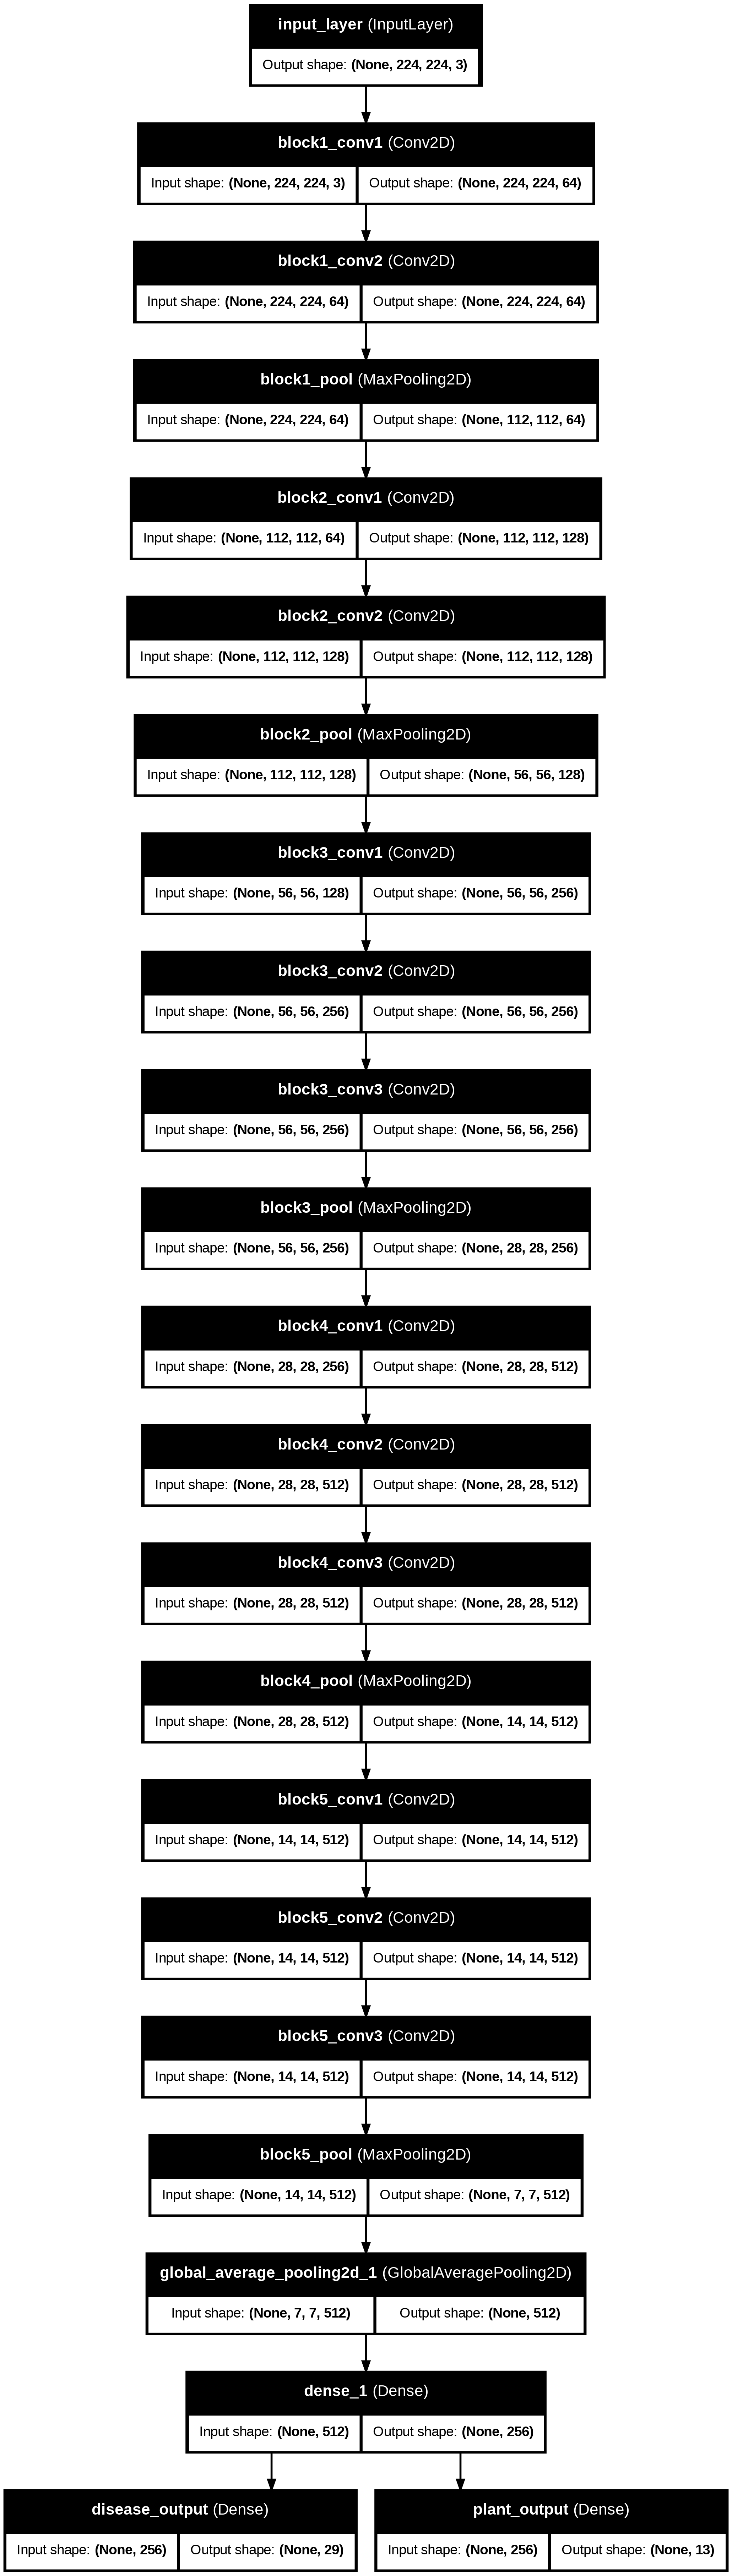

In [ ]:
plot_model(
    model,
    to_file="cnn_architecture.png",
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=200
)


In [ ]:
from tensorflow.keras.optimizers import Adam


In [ ]:
model.compile(
    optimizer=Adam(1e-5),
    loss={
        "plant_output": "sparse_categorical_crossentropy",
        "disease_output": "sparse_categorical_crossentropy"
    },
    metrics={
        "plant_output": "accuracy",
        "disease_output": "accuracy"
    }
)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

SAVE_DIR = "/content/drive/MyDrive/checkpoints"

Mounted at /content/drive


In [ ]:
import os
os.makedirs(SAVE_DIR, exist_ok=True)


In [ ]:
import tensorflow as tf

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_DIR, "epoch_{epoch:02d}.weights.h5"),
    save_weights_only=True,
    save_freq="epoch",
    verbose=1
)

best_cb = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(SAVE_DIR, "best.weights.h5"),
    save_weights_only=True,
    monitor="val_disease_output_loss",
    save_best_only=True
)


csv_logger = tf.keras.callbacks.CSVLogger(
    os.path.join(SAVE_DIR, "training_log.csv"),
    append=True
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)


In [ ]:
plant_classes = np.unique(df_train["plant_id"])
print(plant_classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
plant_classes = np.unique(df_train["plant_id"])

plant_weights = compute_class_weight(
    class_weight="balanced",
    classes=plant_classes,
    y=df_train["plant_id"]
)

plant_class_weight = dict(zip(plant_classes, plant_weights))

print("Plant class weights:")
print(plant_class_weight)
disease_classes = np.unique(df_train["disease_id"])

disease_weights = compute_class_weight(
    class_weight="balanced",
    classes=disease_classes,
    y=df_train["disease_id"]
)

disease_class_weight = dict(zip(disease_classes, disease_weights))

print("Disease class weights:")
print(disease_class_weight)


Plant class weights:
{np.int64(0): np.float64(1.8633674018289403), np.int64(1): np.float64(1.2116895093331637), np.int64(2): np.float64(1.2821858806110775), np.int64(3): np.float64(2.133243757697906), np.int64(4): np.float64(1.0558634449124362), np.int64(5): np.float64(1.0013928674673465), np.int64(6): np.float64(0.7390511656774894), np.int64(7): np.float64(1.5305884715806386), np.int64(8): np.float64(1.6429803380476027), np.int64(9): np.float64(1.8910173697270471), np.int64(10): np.float64(2.2171534970324682), np.int64(11): np.float64(2.5961708796075493), np.int64(12): np.float64(0.2240370651285579)}
Disease class weights:
{np.int64(0): np.float64(4.293892269551499), np.int64(1): np.float64(3.532072673340749), np.int64(2): np.float64(3.4852282081770785), np.int64(3): np.float64(4.610284331518451), np.int64(4): np.float64(0.911186570376393), np.int64(5): np.float64(3.220419202163624), np.int64(6): np.float64(2.3379555773714564), np.int64(7): np.float64(5.474712643678161), np.int64(8): 

In [ ]:
history = model.fit(
    train_seq,
    validation_data=val_seq,
    epochs=20,
    callbacks=[checkpoint_cb, best_cb, csv_logger, early_stop],
    verbose=1
)


Epoch 1/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - disease_output_accuracy: 0.4371 - disease_output_loss: 2.0553 - loss: 3.1413 - plant_output_accuracy: 0.6797 - plant_output_loss: 1.0871

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: saving model to /content/drive/MyDrive/checkpoints/epoch_01.weights.h5
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 340s 269ms/step - disease_output_accuracy: 0.4373 - disease_output_loss: 2.0546 - loss: 3.1400 - plant_output_accuracy: 0.6799 - plant_output_loss: 1.0866 - val_disease_output_accuracy: 0.8613 - val_disease_output_loss: 0.4072 - val_loss: 0.5283 - val_plant_output_accuracy: 0.9641 - val_plant_output_loss: 0.1204
Epoch 2/20
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - disease_output_accuracy: 0.8824 - disease_output_loss: 0.4037 - loss: 0.4414 - plant_output_accuracy: 0.9806 - plant_output_loss: 0.0377
Epoch 2: saving model to /content/drive/MyDrive/checkpoints/epoch_02.weights.h5
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 296s 248ms/step - disease_output_accuracy: 0.8824 - disease_output_loss: 0.4037 - loss: 0.4414 - plant_output_accuracy: 0.9806 - plant_output_loss: 0.0377 - val_disease_output_accuracy: 0.9279 - val_disease_output_loss: 0.2220 - val_loss: 0.2482 - val_plant_output_acc

In [ ]:
model.save("/content/drive/MyDrive/plant_model.keras")

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input

def prepare_single_image(img_path, img_size=224):
    img = cv2.imread(img_path)

    if img is None:
        raise ValueError("Image not found or cannot be read")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (img_size, img_size))
    img = preprocess_input(img)   # 🔥 SAME AS TRAINING
    img = np.expand_dims(img, axis=0)

    return img


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/plant_model.keras")



In [ ]:
model.load_weights("/content/drive/MyDrive/checkpoints/best.weights.h5")


In [ ]:
type(pred)

dict

In [ ]:
pred.keys()

dict_keys(['plant_output', 'disease_output'])

In [ ]:
print(plant_pred)

[[1.0000000e+00 1.4945361e-18 1.4190933e-10 4.4430482e-15 5.3661093e-08
  2.9462335e-09 2.3522293e-12 2.2163988e-14 1.6101566e-08 8.8206165e-11
  4.8608211e-11 4.3850730e-12 1.0101657e-12]]


In [ ]:
print(disease_pred)

[[9.6508312e-01 3.4741282e-02 1.7886011e-13 6.6446267e-12 1.6991448e-04
  4.9002338e-16 1.3057633e-10 5.0315048e-06 1.2534691e-10 4.2798021e-07
  4.5710365e-18 1.2670691e-11 1.2015886e-10 1.7848246e-10 5.7966605e-09
  3.8728540e-10 1.0859393e-12 1.7339505e-11 1.3536489e-07 4.9269440e-16
  1.0574926e-12 4.3384289e-12 4.1448620e-12 1.6871923e-12 9.6714108e-13
  2.6535496e-17 7.9883128e-17 4.6722196e-11 2.8619668e-10]]


In [ ]:
print(plant_classes)

['Cassava', 'Rice', 'apple', 'cherry (including sour)', 'corn (maize)', 'grape', 'orange', 'peach', 'pepper, bell', 'potato', 'squash', 'strawberry', 'tomato']


In [ ]:
img = prepare_single_image("/content/dataset/image data/test/grape/esca (black measles)/01c74b8d-1113-47c0-86a3-6ceea27853c0___FAM_B.Msls 4113.JPG")

pred = model.predict(img)
plant_pred=pred['plant_output']
disease_pred=pred['disease_output']

plant_id = np.argmax(plant_pred)
disease_id = np.argmax(disease_pred)

plant_name = plant_classes[plant_id]
disease_name = disease_classes[disease_id]

plant_conf = np.max(plant_pred)
disease_conf = np.max(disease_pred)

print(f"Plant: {plant_name} ({plant_conf:.2%})")
print(f"Disease: {disease_name} ({disease_conf:.2%})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Plant: grape (100.00%)
Disease: esca (black measles) (100.00%)


In [ ]:
pred = model.predict(test_seq, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 40s 221ms/step


In [ ]:
type(pred)

dict

In [ ]:
plant_pred_prob = pred["plant_output"]      # shape: (N, num_plants)
disease_pred_prob = pred["disease_output"]  # shape: (N, num_diseases)


In [ ]:
type(plant_pred_prob)

numpy.ndarray

In [ ]:

plant_pred_id = np.argmax(plant_pred_prob, axis=1)
disease_pred_id = np.argmax(disease_pred_prob, axis=1)

In [ ]:
plant_true_id = df_test["plant_id"].values
disease_true_id = df_test["disease_id"].values


In [ ]:
plant_pred_name = plant_encoder.inverse_transform(plant_pred_id)
plant_true_name = plant_encoder.inverse_transform(plant_true_id)

disease_pred_name = disease_encoder.inverse_transform(disease_pred_id)
disease_true_name = disease_encoder.inverse_transform(disease_true_id)


<Figure size 800x800 with 0 Axes>

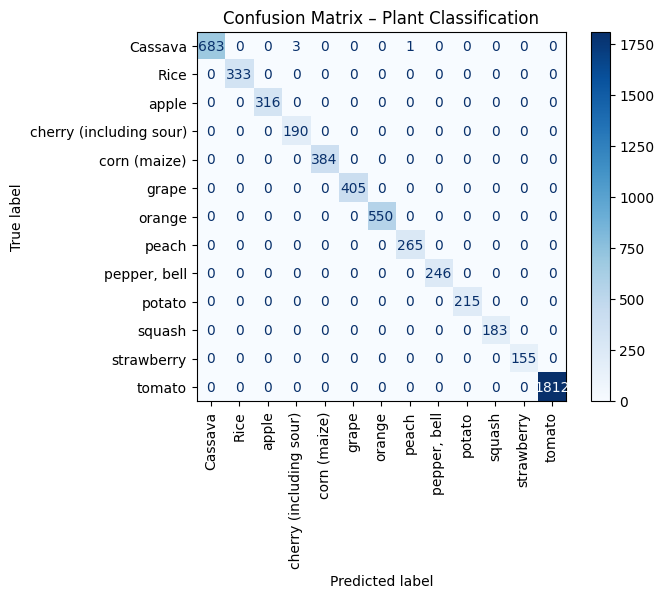

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_plant = confusion_matrix(
    plant_true_id,
    plant_pred_id
)

disp_plant = ConfusionMatrixDisplay(
    confusion_matrix=cm_plant,
    display_labels=plant_encoder.classes_
)

plt.figure(figsize=(8, 8))
disp_plant.plot(
    xticks_rotation=90,
    cmap="Blues",
    values_format="d"
)
plt.title("Confusion Matrix – Plant Classification")
plt.show()


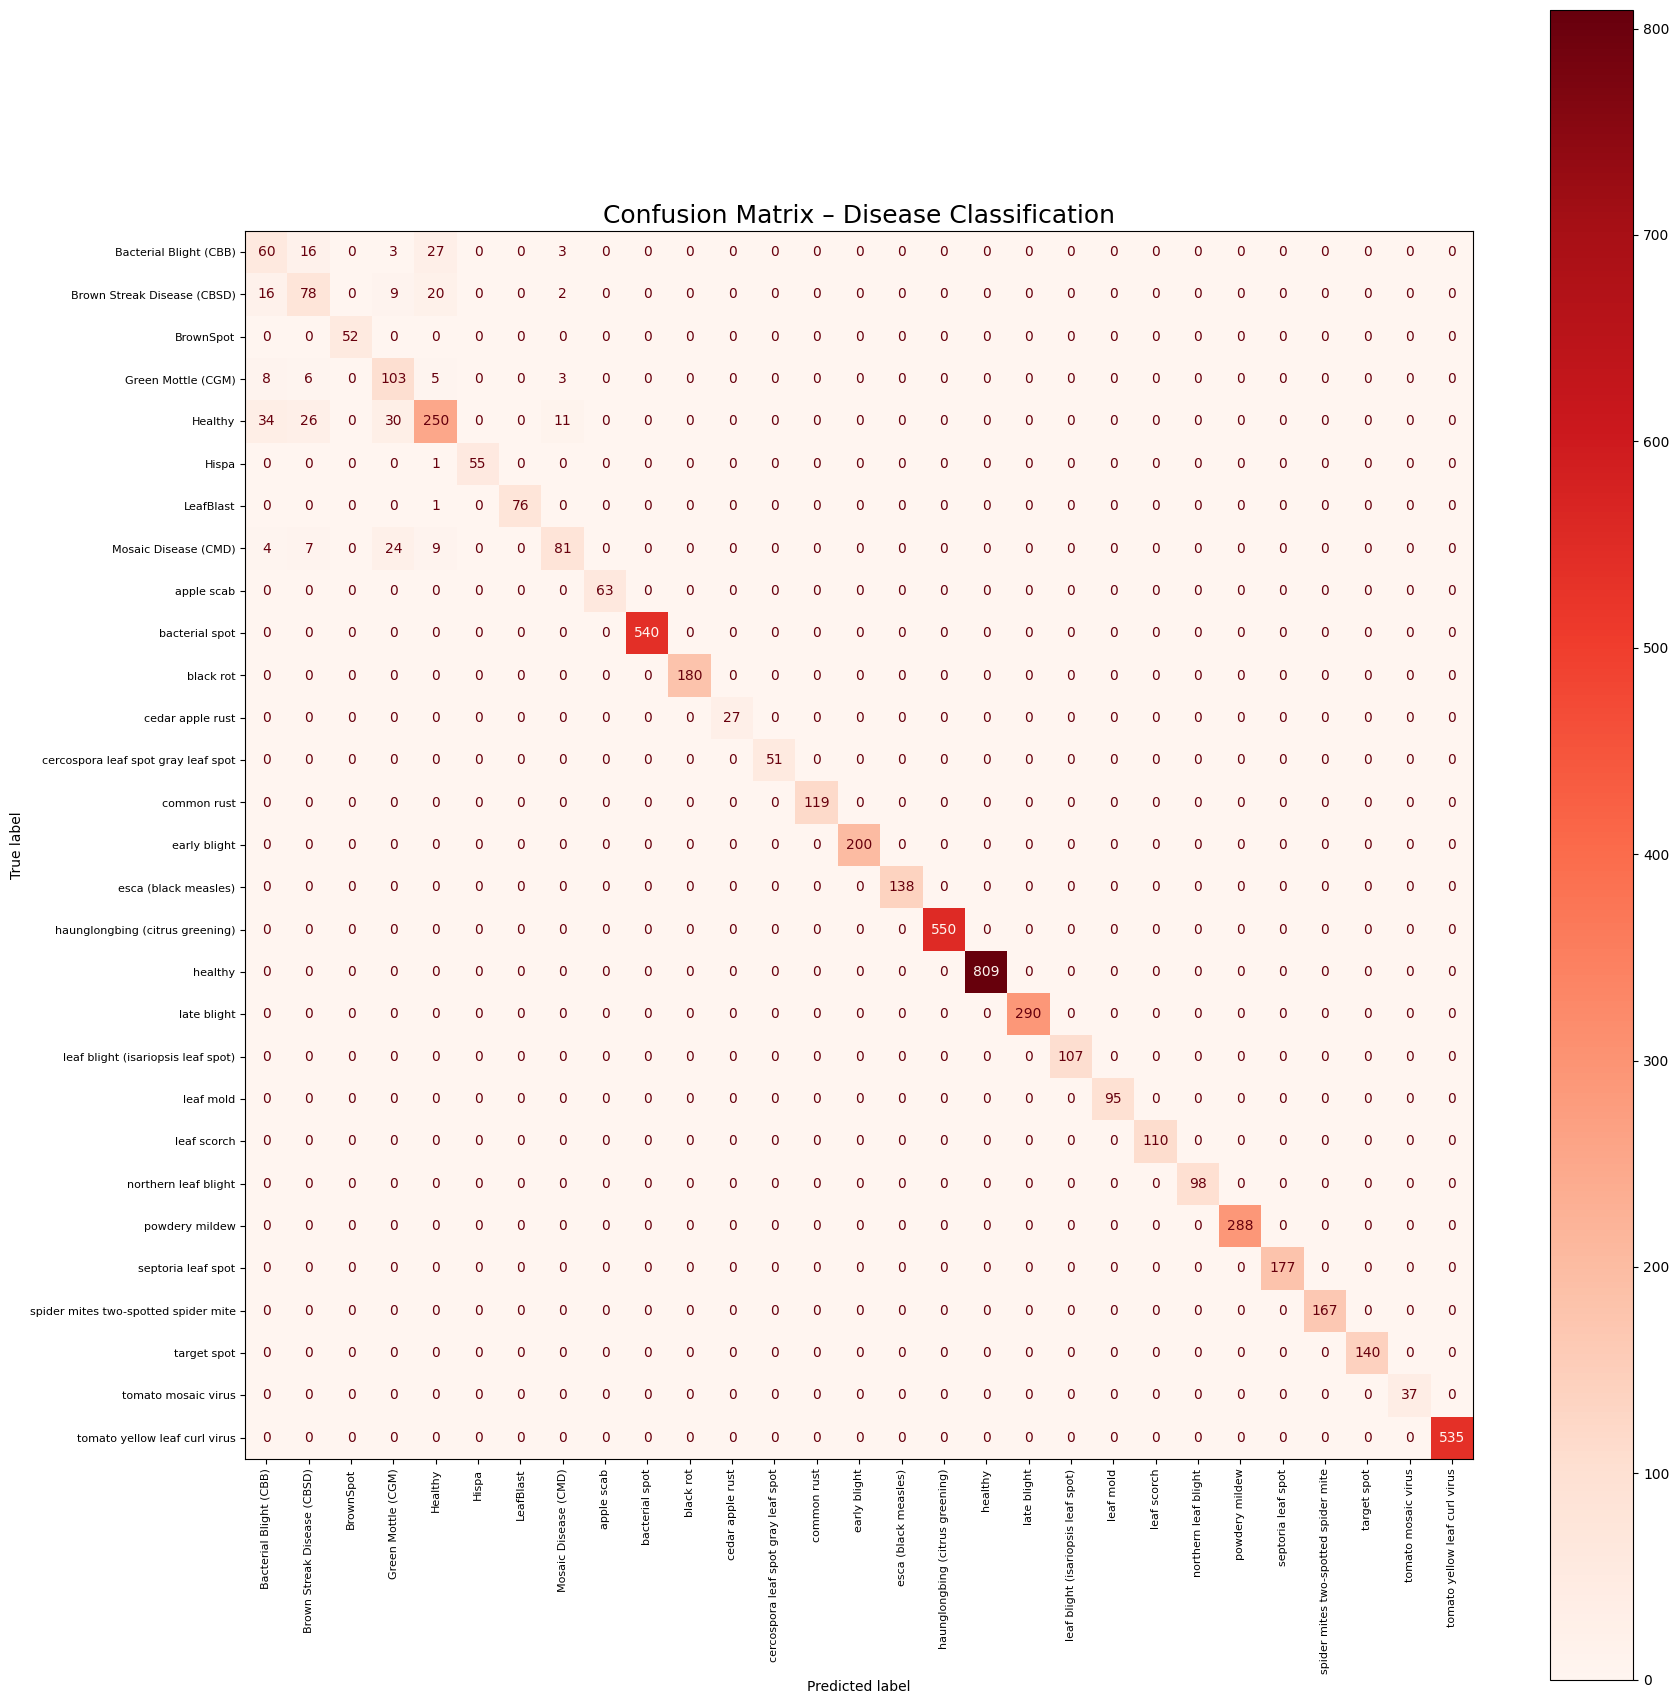

In [ ]:
plt.figure(figsize=(18, 18))

disp_disease = ConfusionMatrixDisplay(
    confusion_matrix=cm_disease,
    display_labels=disease_encoder.classes_
)

disp_disease.plot(
    xticks_rotation=90,
    cmap="Reds",
    values_format="d",
    ax=plt.gca()
)

plt.title("Confusion Matrix – Disease Classification", fontsize=18)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df_log=pd.read_csv("/content/drive/MyDrive/checkpoints/training_log.csv")
df_log.head()

,epoch,disease_output_accuracy,disease_output_loss,loss,plant_output_accuracy,plant_output_loss,val_disease_output_accuracy,val_disease_output_loss,val_loss,val_plant_output_accuracy,val_plant_output_loss
0,0,0.650955,1.216291,1.644335,0.860225,0.428952,0.861281,0.407183,0.528301,0.964052,0.120444
1,1,0.889434,0.392054,0.428450,0.982443,0.036353,0.927892,0.222028,0.248240,0.993128,0.025857
2,2,0.933524,0.248266,0.263039,0.992337,0.014795,0.946818,0.170322,0.181847,0.996617,0.011259
3,3,0.952420,0.176870,0.185346,0.995958,0.008457,0.957814,0.134372,0.143639,0.997885,0.009057
4,4,0.965699,0.131970,0.137027,0.997612,0.005043,0.963206,0.127727,0.135371,0.998414,0.007445


<function matplotlib.pyplot.show(close=None, block=None)>

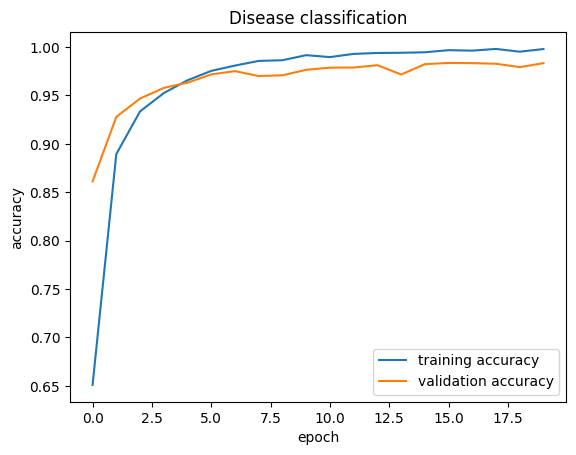

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_log['epoch'],df_log['disease_output_accuracy'],label="training accuracy")
plt.plot(df_log['epoch'],df_log['val_disease_output_accuracy'],label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("Disease classification")
plt.show

In [ ]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

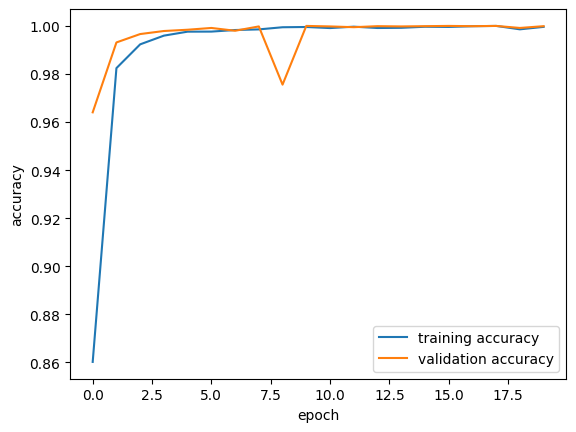

In [ ]:
plt.plot(df_log['epoch'],df_log['plant_output_accuracy'],label="training accuracy")
plt.plot(df_log['epoch'],df_log['val_plant_output_accuracy'],label="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show

In [1]:
from tensorflow.keras.models import load_model

model = load_model("plant_model.keras")



In [7]:
from huggingface_hub import hf_hub_download
import tensorflow as tf

repo_id = "100xFORTUNE/plant_disease_classification"

model_path = hf_hub_download(
    repo_id=repo_id,
    filename="plant_model.keras"   # or "model.h5"
)

model = tf.keras.models.load_model(model_path)


c:\Users\sjija\anaconda3\envs\tf219\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sjija\anaconda3\envs\tf219\lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sjija\.cache\huggingface\hub\models--100xFORTUNE--Plant_disease_classification. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In ord